<a href="https://colab.research.google.com/github/RianNugroho/pengpol/blob/master/Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import random
import math
##fungsi Kmeans dan euclidean distance

def dist(arr1, arr2):
    if (len(arr1) != len(arr2)):
        return
    temp = 0
    for i in range(len(arr1)):
        temp += math.pow(arr1[i] - arr2[i], 2)
    return math.sqrt(temp)





def kmeans(no_centroid, dataset):
  #balikan  berupa koordinat centroid dan data mana termasuk centroid mana
    union = dict()
    centroid = dict()
    ##init centroid
    
    for i in range(no_centroid):
        centroid[i] = dataset[random.randint(0,len(dataset)-1 )]
       
   
    cek = False

    while (True):
        newCentro = dict()
        count = dict()
        ##inisiasi variabel sementara untuk menampung nilai centroid baru
        for i in range(len(centroid)):
            a = []
            for j in range(len(centroid[i])):
                a += [0.0]
            newCentro[i] = a
            count[i] = 0

        ##menentukan data terdekat dengan centroid mana mana
        for i in range(len(dataset)):
            min =99999999
            for j in range(len(centroid)):
                temp = dist(dataset[i], centroid[j])
                if (temp < min):
                    union[i] = j
                    min = temp

          ##mencari total nilai dari data yang termasuk sebuah centroid

            for j in range(len(dataset[i])):
                newCentro[union[i]][j] += dataset[i][j]
            count[union[i]] += 1

        ##mencari average centroid. jika perubahan tiap centroid kurang dari 0.0000000000001, maka iterasi selesai

        for i in range(len(newCentro)):
            for j in range(len(newCentro[i])):
                if (count[i] != 0):
                    newCentro[i][j] /= count[i]

        for i in range(len(newCentro)):
            if (dist(newCentro[i], centroid[i]) < 0.00000001):
                cek=True


        if (cek):
            break
        else:
            for i in range(len(centroid)):
                if (count[i] != 0):
                    centroid[i] = newCentro[i]
    dataInCentroid=dict()
    for i in range(no_centroid):
      dataInCentroid[i]=[]
    for i in range(len(dataset)):
      dataInCentroid[union[i]]+=[i]
    return centroid,dataInCentroid



In [0]:
kmeans(3,[[1,2,3],[4,5,6],[7,8,9]])

({0: [4, 5, 6], 1: [1, 2, 3], 2: [4, 5, 6]}, {0: [1, 2], 1: [0], 2: []})

In [0]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [0]:
file=pd.read_csv("https://raw.githubusercontent.com/RianNugroho/pengpol/master/studentInfo.csv")

In [0]:
#import dataset masukkan ke datasets berupa dataset yang dikategorikan berdasarkan code_module. 
##dan dataset1 berupa dataset yang disimpan berdasarkan
##ID data
dataset1=[]
datasets=dict()
datasets[0]=[]
datasets[1]=[]
datasets[2]=[]
datasets[3]=[]
datasets[4]=[]
datasets[5]=[]
datasets[6]=[]


for i in range(len(file["id_student"])):
  fr=""
  he=""
  index=0
  if(file["final_result"][i]=='Pass'):
    fr=3
  elif (file["final_result"][i]=='Withdrawn'):
    fr=2
  elif (file["final_result"][i]=='Distinction'):
    fr=1
  else:
    fr=0
  if(file["highest_education"][i]=='Lower Than A Level'):
    he=0
  elif(file["highest_education"][i]=='A Level or Equivalent'):
    he=1
  elif(file["highest_education"][i]=='HE Qualification'):
    he=2
  else:
    he=3
  if(file["code_module"][i]=="AAA"):
    index=0
  elif(file["code_module"][i]=="BBB"):
    index=1
  elif(file["code_module"][i]=="CCC"):
    index=2
  elif(file["code_module"][i]=="DDD"):
    index=3
  elif(file["code_module"][i]=="EEE"):
    index=4
  elif(file["code_module"][i]=="FFF"):
    index=5
  elif(file["code_module"][i]=="GGG"):
    index=6
  datasets[index]+=[[he,file["studied_credits"][i],fr]]
  dataset1+=[[he,file["studied_credits"][i],fr]]




32593


In [0]:
#membuat Kmeans dengan 3,5,7, dan 20 centroid
dim3=[]
for i in range(len(datasets)):
  dim3+=[kmeans(3,datasets[i])]
  print(dim3[i][0])

{0: [1.0531400966183575, 145.38647342995168, 2.1594202898550723], 1: [1.0275229357798166, 65.55045871559633, 0.7614678899082569], 2: [1.0671296296296295, 60.0, 2.8402777777777777]}
{0: [0.7347994825355757, 118.54031910306166, 1.8020698576972833], 1: [0.6579634464751958, 200.57441253263707, 1.8015665796344646], 2: [0.6731323218743999, 60.152679085845975, 1.8849625504129057]}
{0: [0.9207003089598352, 139.783728115345, 1.8609680741503605], 1: [0.9652278177458034, 90.03597122302158, 1.8189448441247003], 2: [1.0247242297451502, 50.49828832255611, 1.7740585774058577]}
{0: [0.8422755459692639, 60.19142626044756, 1.8444324615799408], 1: [0.7996837111228255, 137.29573010015815, 1.8476541908276225], 2: [0.9084084084084084, 89.72222222222223, 1.8288288288288288]}
{0: [0.8831658291457286, 60.12248743718593, 1.967964824120603], 1: [0.849925705794948, 112.65973254086181, 1.9301634472511144], 2: [0.9088191330343797, 30.575485799701045, 1.8684603886397608]}
{0: [0.7852706299911268, 89.78260869565217, 

In [0]:
dim5=[]
for i in range(len(datasets)):
  dim5+=[kmeans(5,datasets[i])]
  print(dim5[i][0])

{0: [0.0, 82.35849056603773, 2.3270440251572326], 1: [0.8947368421052632, 90.0, 2.1578947368421053], 2: [2.0, 80.0, 3.0], 3: [1.0531400966183575, 145.38647342995168, 2.1594202898550723], 4: [1.0633397312859885, 60.02879078694818, 2.4299424184261036]}
{0: [0.7153846153846154, 86.71153846153847, 1.7230769230769232], 1: [0.6569920844327177, 200.96306068601584, 1.79155672823219], 2: [0.672166149068323, 60.0, 1.8860636645962734], 3: [0.7404466501240695, 119.98759305210918, 1.8153846153846154], 4: [0.6893203883495146, 148.7864077669903, 1.766990291262136]}
{0: [0.9652278177458034, 90.03597122302158, 1.8189448441247003], 1: [1.5338842975206612, 30.0, 1.7685950413223142], 2: [0.08403361344537816, 31.113445378151262, 1.638655462184874], 3: [0.9207003089598352, 139.783728115345, 1.8609680741503605], 4: [0.9776035834266518, 60.025195968645015, 1.793952967525196]}
{0: [3.0, 70.0, 3.0], 1: [0.8004201680672269, 137.1875, 1.849264705882353], 2: [0.9009628610729024, 87.70288858321871, 1.83356258596973

In [0]:
dim7=[]
for i in range(len(datasets)):
  dim7+=[kmeans(7,datasets[i])]
  print(dim7[i][1])

{0: [], 1: [2, 4, 10, 12, 14, 15, 22, 23, 25, 30, 33, 41, 45, 55, 59, 61, 64, 81, 82, 83, 84, 90, 104, 106, 107, 108, 114, 157, 162, 175, 186, 194, 195, 228, 237, 239, 243, 247, 248, 252, 256, 260, 267, 270, 271, 274, 278, 281, 283, 285, 295, 298, 309, 311, 321, 327, 333, 338, 340, 344, 350, 351, 353, 359, 365, 376, 384, 386, 398, 399, 401, 402, 403, 404, 405, 411, 415, 421, 423, 434, 436, 437, 442, 446, 455, 456, 467, 469, 473, 475, 516, 532, 539, 545, 546, 547, 551, 553, 561, 566, 581, 617, 624, 636, 638, 641, 647, 648, 651, 658, 659, 666, 667, 671, 674, 680, 682, 683, 685, 687, 692, 699, 700, 710, 713, 716, 722, 727, 740, 741, 744], 2: [3, 5, 11, 16, 19, 20, 24, 26, 37, 39, 46, 49, 58, 60, 62, 63, 66, 73, 91, 92, 102, 109, 110, 113, 119, 120, 122, 123, 128, 132, 138, 139, 141, 144, 146, 149, 152, 159, 181, 182, 187, 191, 202, 208, 230, 231, 233, 246, 251, 254, 259, 262, 263, 264, 265, 269, 275, 284, 287, 288, 289, 291, 292, 294, 315, 317, 318, 326, 332, 336, 345, 346, 347, 352, 354,

In [0]:
dim20=[]
for i in range(len(datasets)):
  dim20+=[kmeans(20,datasets[i])]
  

In [0]:

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

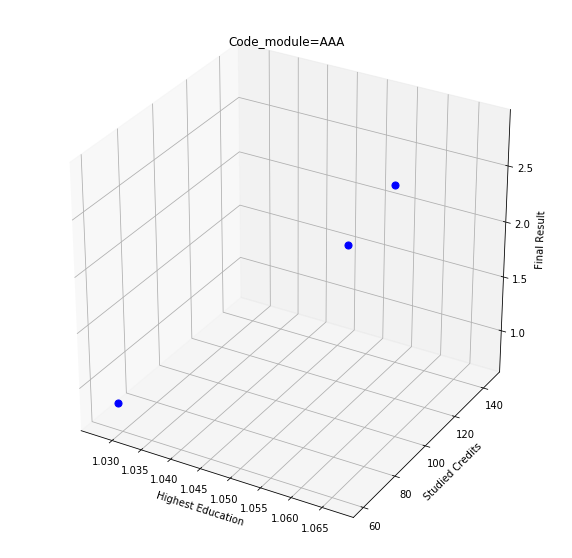

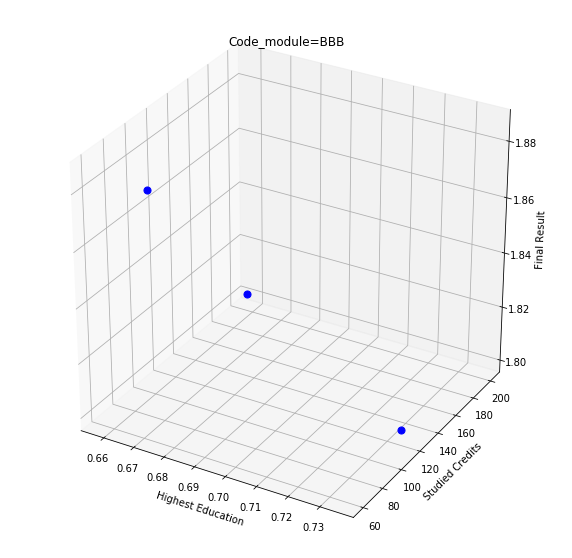

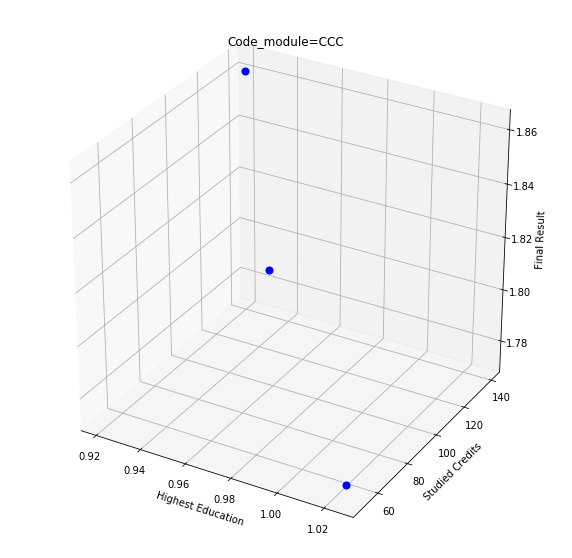

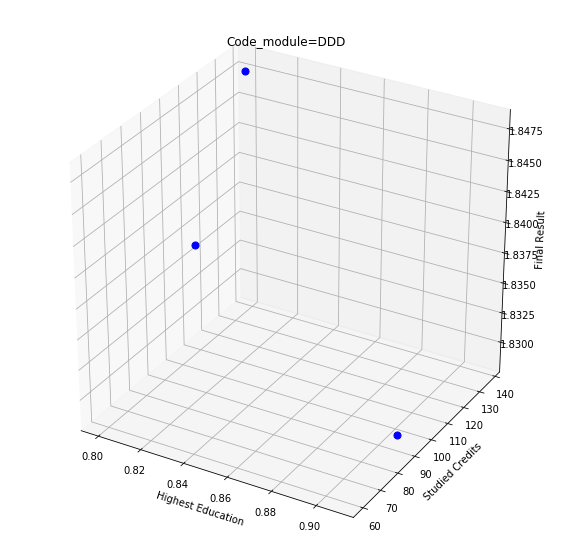

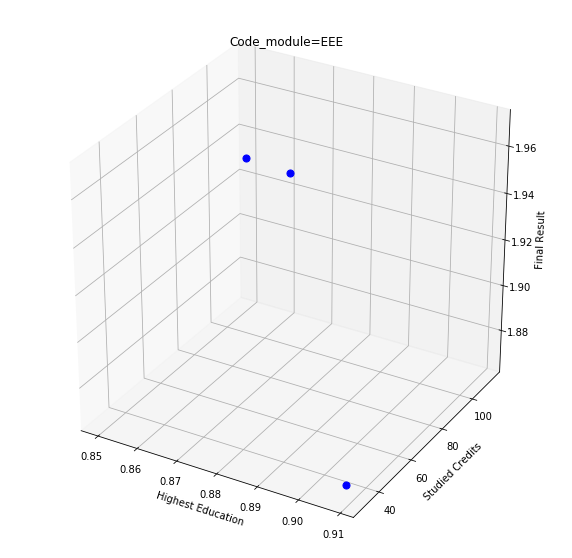

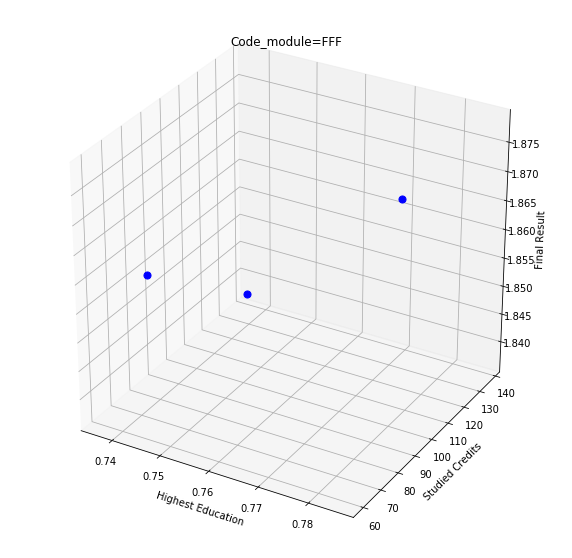

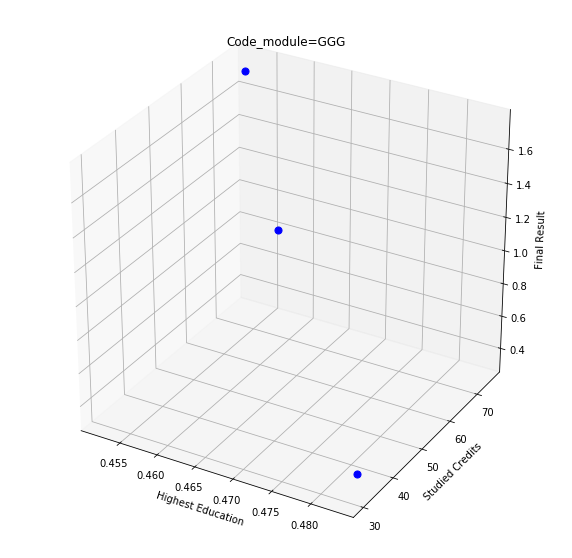

In [0]:
#membuat plot untuk masing-masing Kmeans
for j in range(len(dim3)):
  fig = plt.figure(figsize=(10,10))
  ax = fig.add_subplot(111, projection='3d')
  for i in range(len(dim3[j][0])):
    xs=dim3[j][0][i][0]
    ys=dim3[j][0][i][1]
    zs=dim3[j][0][i][2]
    ax.scatter(xs, ys, zs,s=50, c='b')
  if(j==0):
     plt.title("Code_module=AAA")
  elif(j==1):
     plt.title("Code_module=BBB")
  elif(j==2):
     plt.title("Code_module=CCC")
  elif(j==3):
     plt.title("Code_module=DDD")
  elif(j==4):
     plt.title("Code_module=EEE")
  elif(j==5):
     plt.title("Code_module=FFF")
  elif(j==6):
     plt.title("Code_module=GGG")
  ax.set_xlabel('Highest Education')
  ax.set_ylabel('Studied Credits')
  ax.set_zlabel('Final Result')

  plt.show()

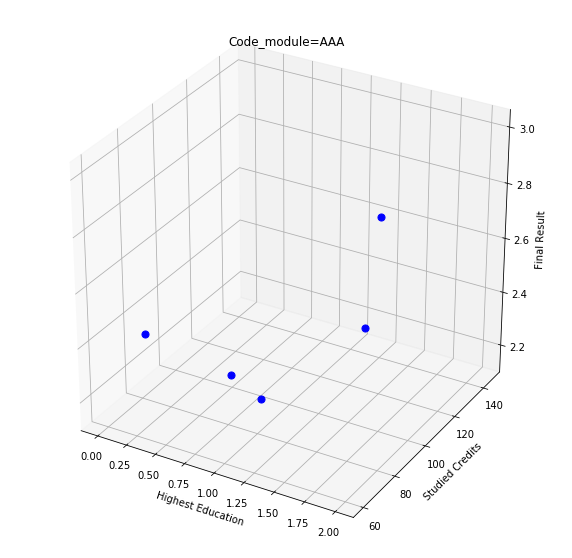

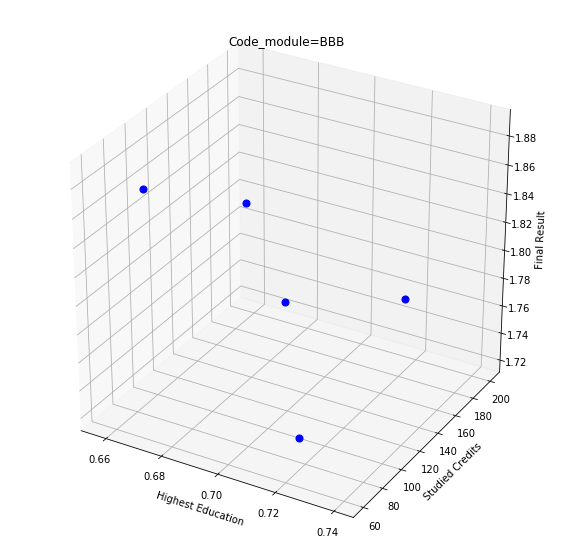

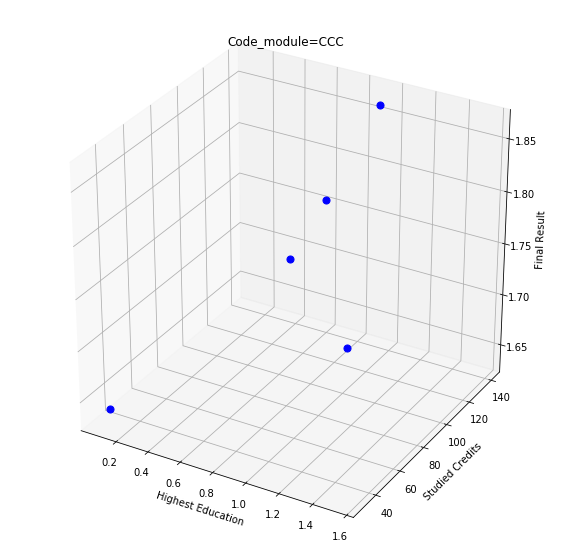

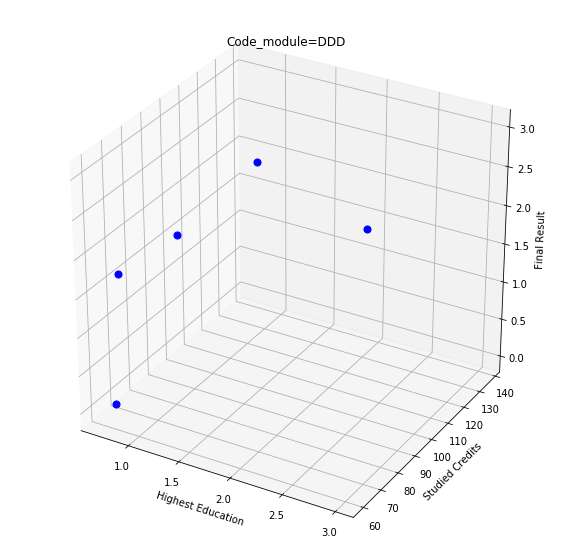

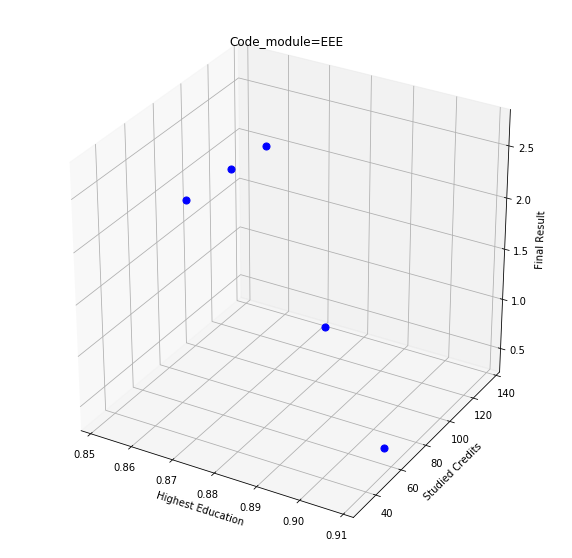

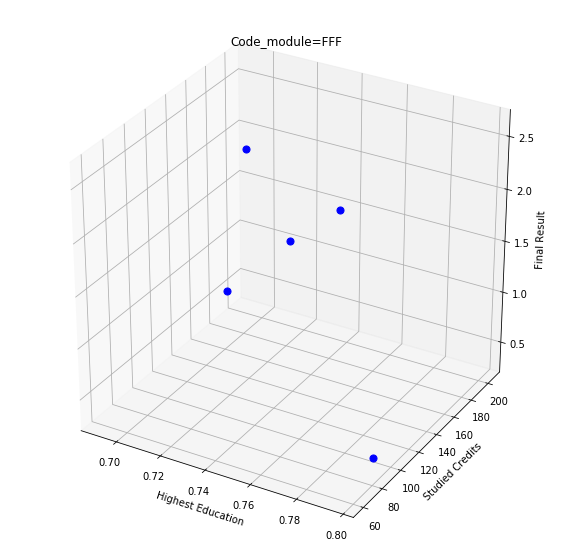

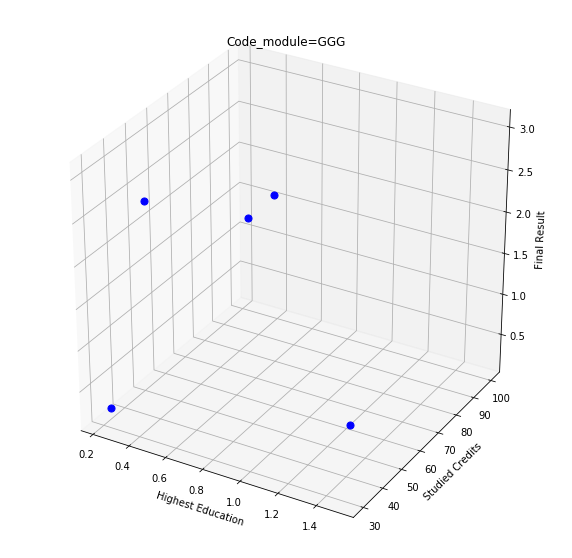

In [0]:
for j in range(len(dim5)):
  fig = plt.figure(figsize=(10,10))
  ax = fig.add_subplot(111, projection='3d')
  for i in range(len(dim5[j][0])):
    xs=dim5[j][0][i][0]
    ys=dim5[j][0][i][1]
    zs=dim5[j][0][i][2]
    ax.scatter(xs, ys, zs,s=50, c='b')
  if(j==0):
     plt.title("Code_module=AAA")
  elif(j==1):
     plt.title("Code_module=BBB")
  elif(j==2):
     plt.title("Code_module=CCC")
  elif(j==3):
     plt.title("Code_module=DDD")
  elif(j==4):
     plt.title("Code_module=EEE")
  elif(j==5):
     plt.title("Code_module=FFF")
  elif(j==6):
     plt.title("Code_module=GGG")
  ax.set_xlabel('Highest Education')
  ax.set_ylabel('Studied Credits')
  ax.set_zlabel('Final Result')

  plt.show()

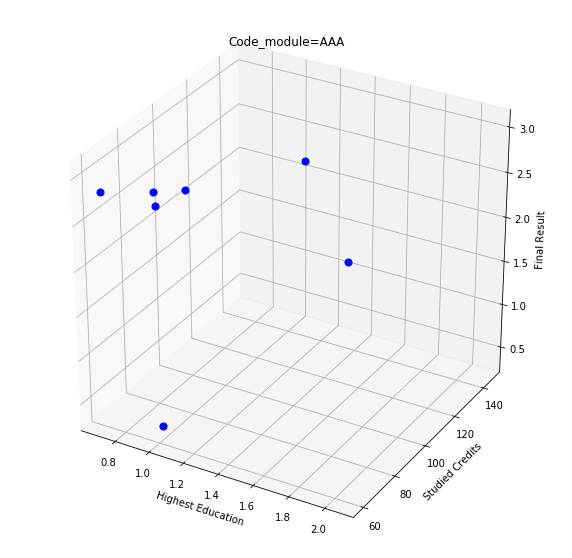

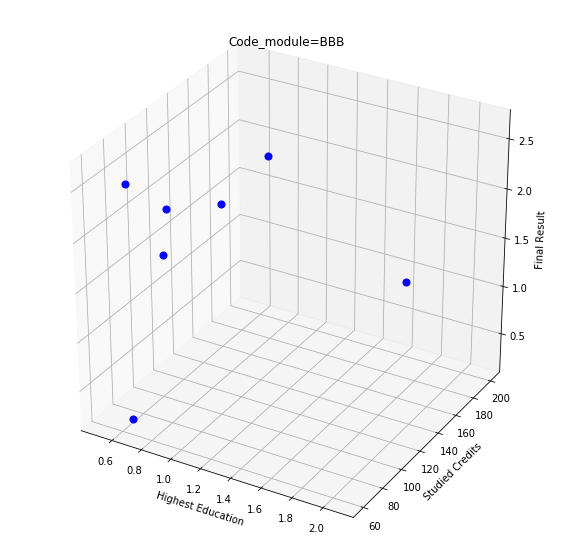

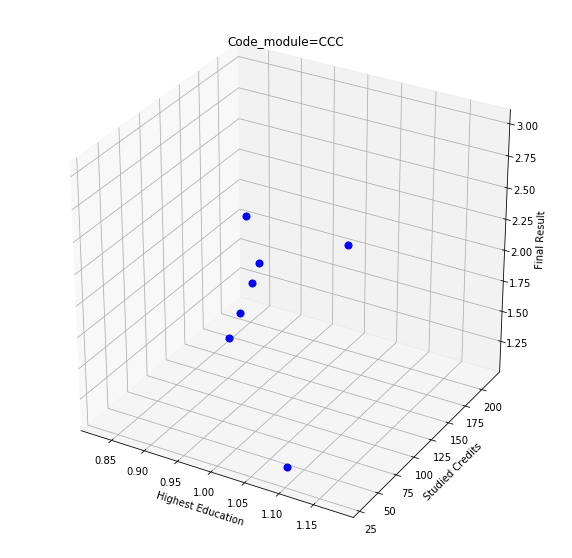

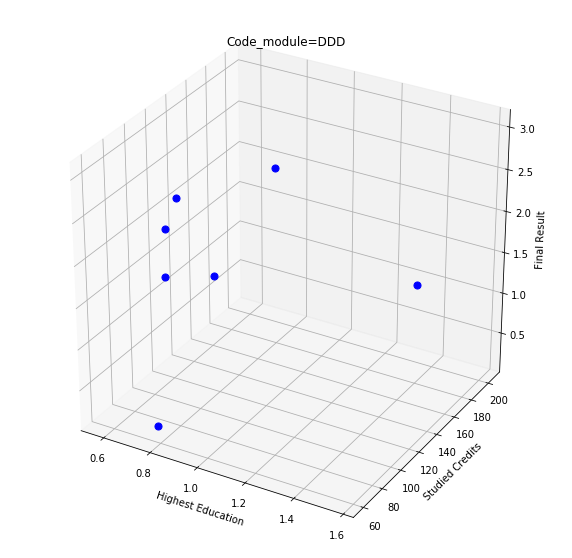

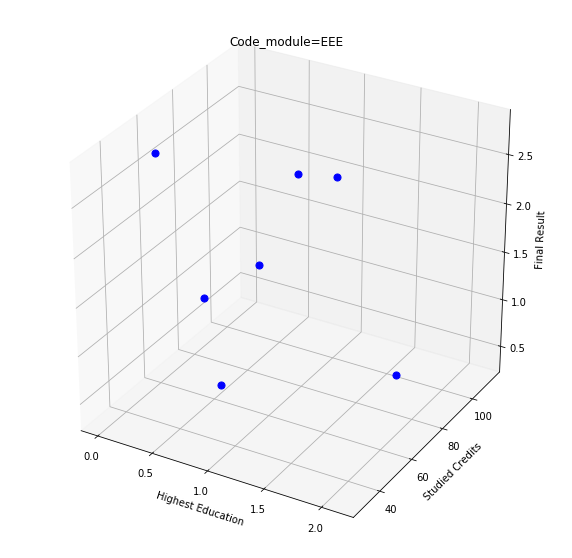

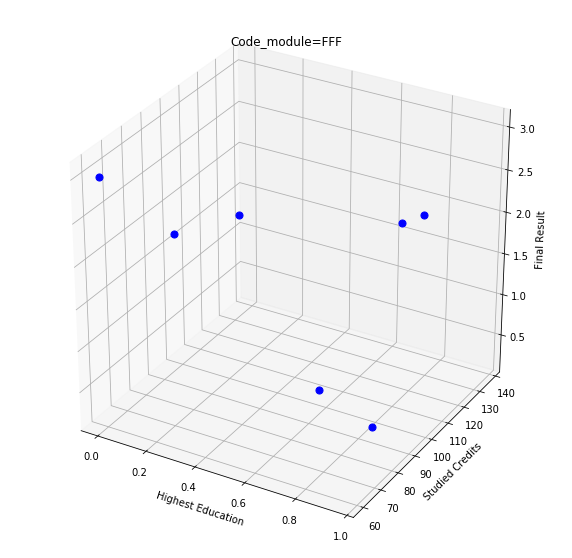

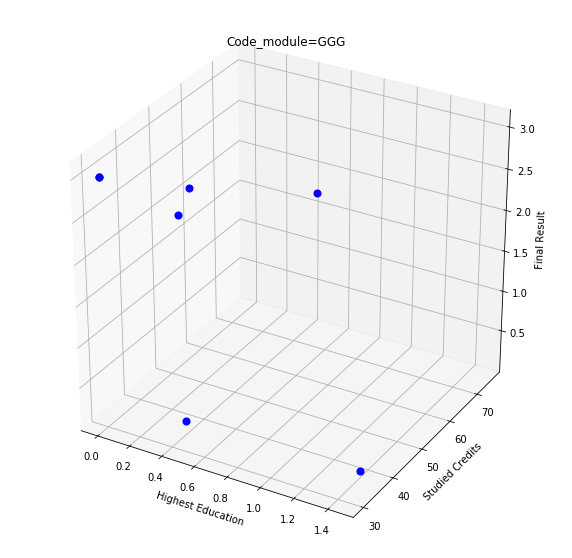

In [0]:
for j in range(len(dim7)):
  fig = plt.figure(figsize=(10,10))
  ax = fig.add_subplot(111, projection='3d')
  for i in range(len(dim7[j][0])):
    xs=dim7[j][0][i][0]
    ys=dim7[j][0][i][1]
    zs=dim7[j][0][i][2]
    ax.scatter(xs, ys, zs,s=50, c='b')
  if(j==0):
     plt.title("Code_module=AAA")
  elif(j==1):
     plt.title("Code_module=BBB")
  elif(j==2):
     plt.title("Code_module=CCC")
  elif(j==3):
     plt.title("Code_module=DDD")
  elif(j==4):
     plt.title("Code_module=EEE")
  elif(j==5):
     plt.title("Code_module=FFF")
  elif(j==6):
     plt.title("Code_module=GGG")
  ax.set_xlabel('Highest Education')
  ax.set_ylabel('Studied Credits')
  ax.set_zlabel('Final Result')

  plt.show()

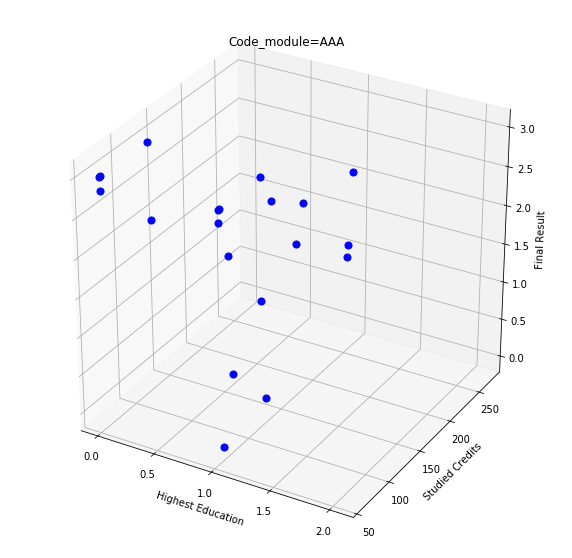

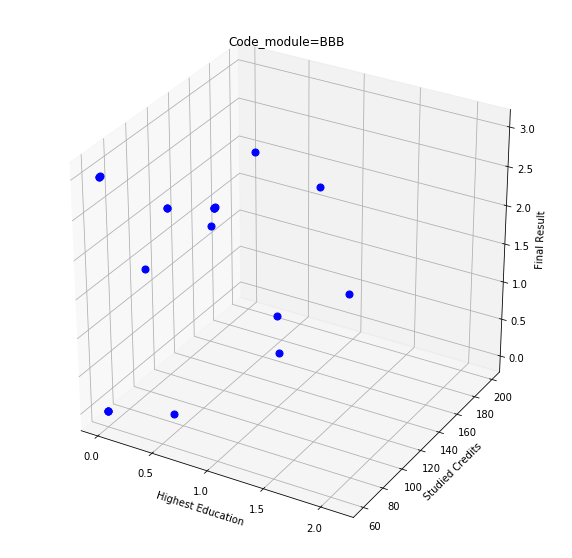

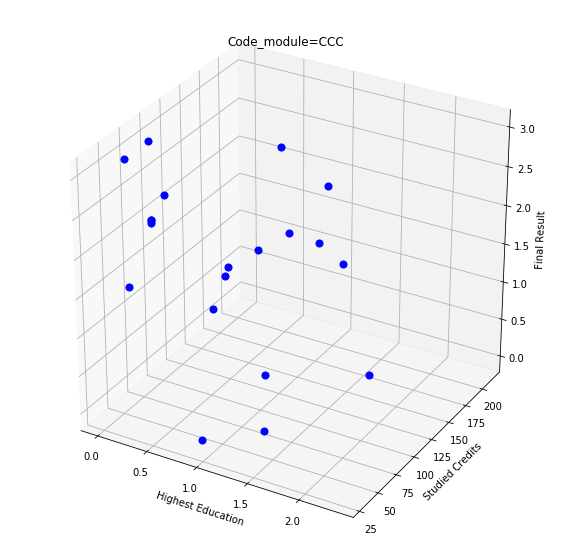

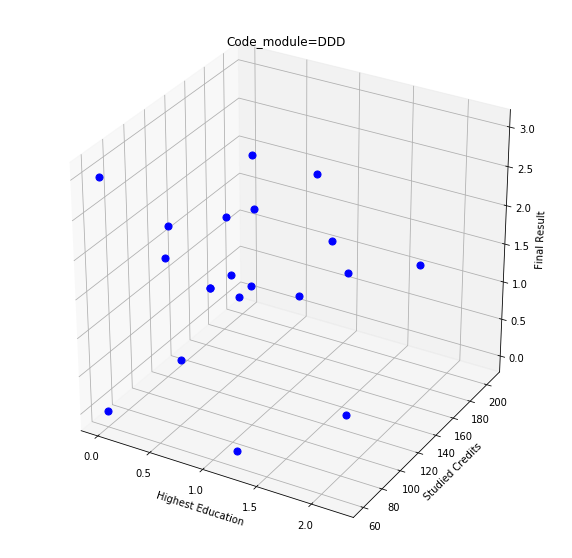

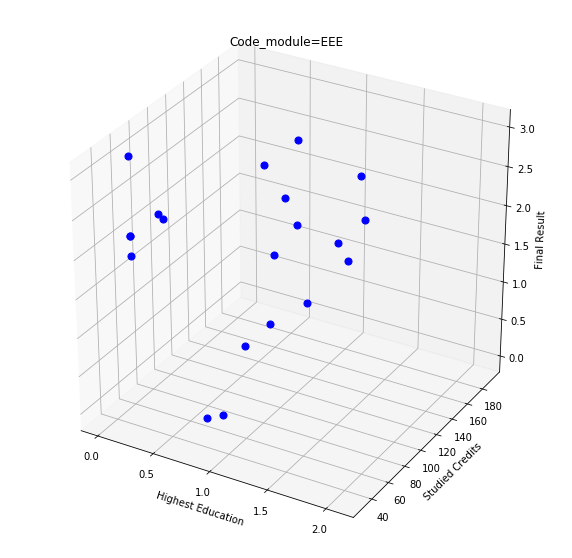

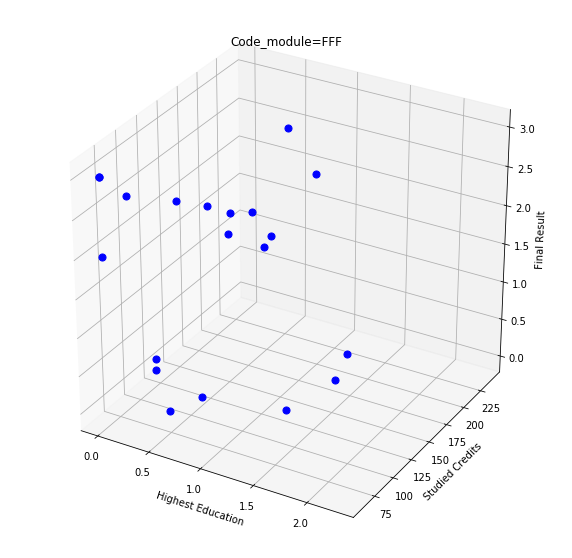

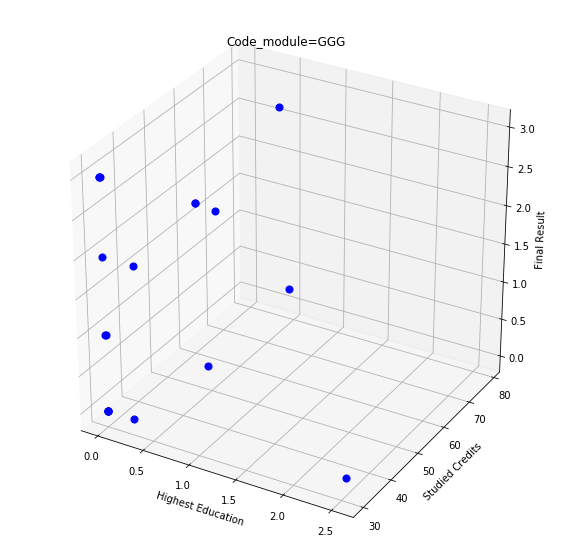

In [0]:
for j in range(len(dim20)):
  fig = plt.figure(figsize=(10,10))
  ax = fig.add_subplot(111, projection='3d')
  for i in range(len(dim20[j][0])):
    xs=dim20[j][0][i][0]
    ys=dim20[j][0][i][1]
    zs=dim20[j][0][i][2]
    ax.scatter(xs, ys, zs,s=50, c='b')
  if(j==0):
     plt.title("Code_module=AAA")
  elif(j==1):
     plt.title("Code_module=BBB")
  elif(j==2):
     plt.title("Code_module=CCC")
  elif(j==3):
     plt.title("Code_module=DDD")
  elif(j==4):
     plt.title("Code_module=EEE")
  elif(j==5):
     plt.title("Code_module=FFF")
  elif(j==6):
     plt.title("Code_module=GGG")
  ax.set_xlabel('Highest Education')
  ax.set_ylabel('Studied Credits')
  ax.set_zlabel('Final Result')

  plt.show()

In [0]:
def SillhouteCoeff(dataInCentroid,datasets):
  #silhouette Coefficient berdasarkan 
  ##https://stackoverflow.com/questions/23387275/how-do-you-manually-compute-for-silhouette-cohesion-and-separation-of-cluster
    maxCoeff=-2
    for i in range(len(dataInCentroid)):
        averageInternalDist=0.0
        if(len(dataInCentroid[i])!=0):
          for j in range(len(dataInCentroid[i])):
              if(j!=0):           
                  averageInternalDist+=dist(datasets[dataInCentroid[i][0]],datasets[dataInCentroid[i][j]])
          if(len(dataInCentroid[i])!=0):
            averageInternalDist/=len(dataInCentroid[i])
        minDist=99999999999
        for j in range(len(dataInCentroid)):
            if(i!=j):
              averageExtClusterDist=0.0
              if(len(dataInCentroid[i])!=0 and len(dataInCentroid[j])!=0):
                for k in range(len(dataInCentroid[j])):                 
                    averageExtClusterDist+=dist(datasets[dataInCentroid[i][0]],datasets[dataInCentroid[j][k]])
                if(len(dataInCentroid[j])!=0):
                    averageExtClusterDist/=len(dataInCentroid[j])
                if(averageExtClusterDist<minDist):
                    minDist=averageExtClusterDist
        averageExtClusterDist=minDist
        temp=0
        if(averageExtClusterDist!=0):
          temp=1-(averageInternalDist/averageExtClusterDist)
        
        if(temp>maxCoeff):
             maxCoeff=temp

    return maxCoeff

In [1]:
#silhoutte coefficient berdasarkan code_module tiap Kmeans
for i in range(len(dim3)):
  
  print(SillhouteCoeff(dim3[i][1],dataset1))

NameError: ignored

In [0]:
for i in range(len(dim5)):
  print(SillhouteCoeff(dim5[i][1],dataset1))

1.0
0.03308934758687743
0.20708807709901422
1.0
0.016139623940654158
0.0009981869662288867
0.04287989797461256


In [0]:
for i in range(len(dim7)):
  print(SillhouteCoeff(dim7[i][1],dataset1))

1.0
0.03308934758687743
-0.029206588079349283
-0.01882568687181707
0.11166032663603953
0.027328418339876204
1.0


In [0]:
for i in range(len(dim20)):
  print(SillhouteCoeff(dim20[i][1],dataset1))

1.0
1.0
1.0
1.0
1.0
1.0
1.0
